In [46]:
# Region of Intrest

# (x_offset, y_offset) - starting point
# x_end = (x_offset + width ) # width of the small image
# y_offset = (y_offset + height ) # height of the small image
# X_end, y_end -> ending point ( calculate this )

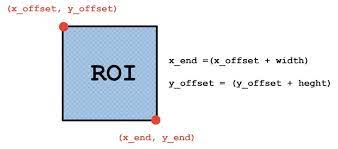

In [47]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
img=cv2.imread('/content/randomimage.jpeg') # small image
img1=cv2.imread('/content/b&wimages.jpeg') # larger image


(54, 57, 3)

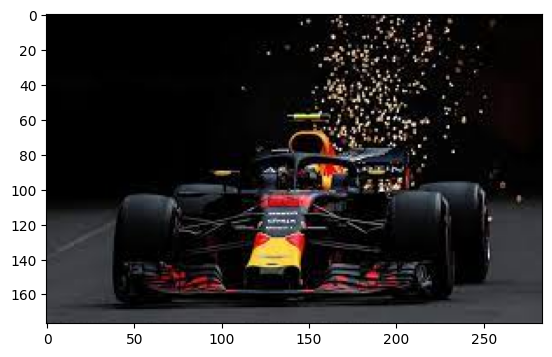

In [49]:
# converting to different color spaces

# THIS IS A SMALLER IMAGE

img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
img=cv2.resize(img,(57,54))
img.shape



(154, 157, 3)

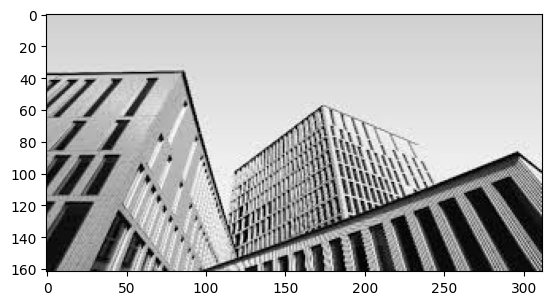

In [50]:
# THIS IS GOING TO BE THE LARGER IMAGE

# converting to different color spaces
img1=cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
plt.imshow(img1)
img1=cv2.resize(img1,(157,154))

img1.shape

In [51]:
# Set the initial x and y offsets to 0
x_offset=0
y_offset=0

# Calculate the ending y-coordinate of the image by adding the image's height to the y offset
y_end=y_offset+img.shape[0]

# Calculate the ending x-coordinate of the image by adding the image's width to the x offset
x_end=x_offset+img.shape[1]

# x_offset and y_offset are starting points for positioning an image on a larger canvas.
# y_end is calculated by adding the height of the image to the y offset. This gives the y-coordinate where the bottom of the image would be placed.
# x_end is calculated by adding the width of the image to the x offset. This gives the x-coordinate where the right side of the image would be placed.

In [52]:
img1[y_offset:y_end,x_offset:x_end]=img

# This line of code is copying the contents of the img (presumably an image) and pasting it onto another image called img1.
# The positioning of this copy-paste action is determined by the values of y_offset, y_end, x_offset, and x_end.

# y_offset:y_end specifies a range of rows in the img1 image where the copied img will be pasted vertically.
# It starts from the y_offset row and goes up to (but doesn't include) the y_end row.

# x_offset:x_end specifies a range of columns in the img1 image where the copied img will be pasted horizontally.
# It starts from the x_offset column and goes up to (but doesn't include) the x_end column.

# So, effectively, this line of code is placing the contents of img onto img1 at a specific position determined by the offsets and end coordinates.
# The result is that img will appear within the defined region of img1.

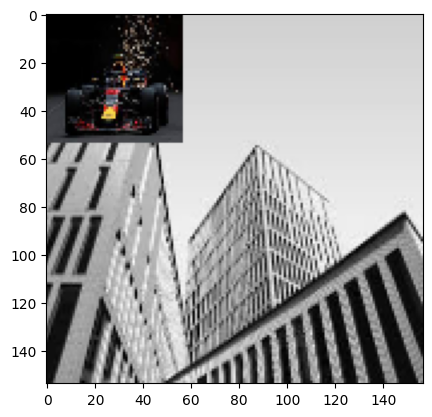

In [53]:
plt.imshow(img1)

In [55]:
# REGION OF INTREST

# x_offset and y_offset are being calculated based on the difference between certain values (154 and 54 for x_offset, and 157 and 57 for y_offset).
# These values are used to determine where the smaller image (foreground image) will be placed on top of a larger image.

x_offset = 154 - 54
y_offset = 157-57


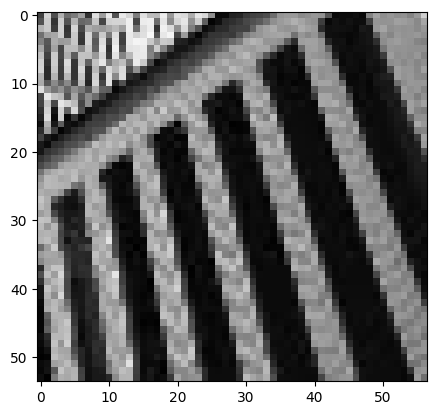

In [58]:
# Creating an ROI of the same size of the
# foreground image ( smaller image that will go on top )
rows,cols,channels = img.shape

# roi = img1[0:rows,0:cols] # TOP LEFT CORNER
# The Region of Interest (ROI) is defined in the larger image (img1) using the calculated x_offset and y_offset as the starting point.
# The ROI is essentially a subsection of img1 that matches the size of the foreground image.

roi = img1[y_offset:154,x_offset:157]
plt.imshow(roi)

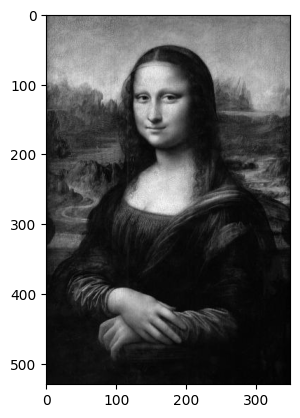

In [101]:
img=cv2.imread('/content/image.jpg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(img,cmap='gray')


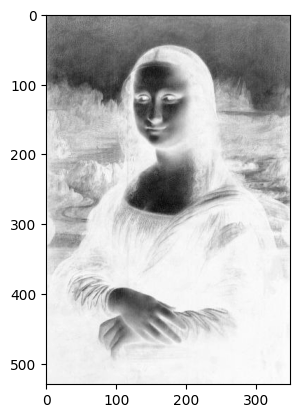

In [103]:
# creating a mask -> its an inverse layer ( black and white to white and black)

# cv2.bitwise_not(img) is a function that takes an image (img) and creates an inverse version of it. In this inverse version, black becomes white, and white becomes black.
# This is commonly used to create masks where the background becomes the foreground and vice versa.
mask_inv=cv2.bitwise_not(img)

# The code then displays the resulting inverted mask using plt.imshow(mask_inv, cmap='gray'), which shows the mask as an image with white and black regions.
# The cmap='gray' argument specifies that the colormap used for display should be grayscale, which is suitable for black and white images.
plt.imshow(mask_inv,cmap='gray')

In [104]:
# Creating a 3-channel white background image with the same dimensions as img
white_bg = np.full(img.shape, 255, dtype=np.uint8)

# Using bitwise OR operation to combine the white background image with itself,
# using the mask_inv as a mask
bg = cv2.bitwise_or(white_bg, white_bg, mask=mask_inv)

# np.full(img.shape, 255, dtype=np.uint8) creates an all-white image with the same dimensions as the img. This creates a white background to place the foreground image on.

# The cv2.bitwise_or() function performs a bitwise OR operation between two images. In this case, the operation is applied between white_bg and itself, but with the mask mask_inv.
# This means that where the mask is black (corresponding to the original image), no change occurs, and where the mask is white (corresponding to the inverse),
# the white background gets combined.

In [105]:
bg.shape

(530, 350)

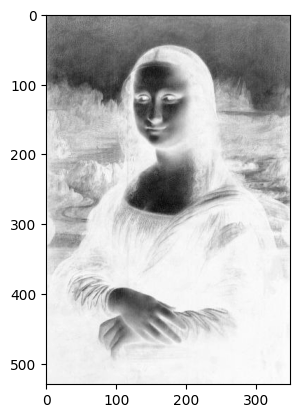

In [109]:
# Grab Original FG image and place on top of Mask

plt.imshow(mask_inv,cmap='gray')

In [112]:
fg = cv2.bitwise_or(img, img, mask=mask_inv)

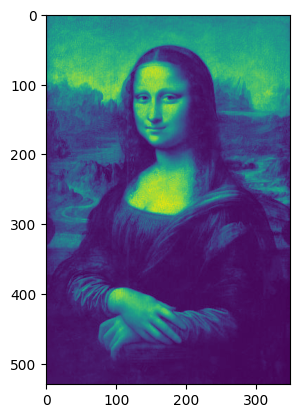

In [113]:
plt.imshow(fg)

In [115]:
fg.shape

(530, 350)

In [117]:
# rest continued in 01-Blending-and-Pasting-Images.ipynb